<a href="https://colab.research.google.com/github/09jainayush/ML-Projects/blob/main/PREDICTING_TURKISH_EMOTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/Acoustic Features.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           400 non-null    object 
 1   _RMSenergy_Mean                                 400 non-null    float64
 2   _Lowenergy_Mean                                 400 non-null    float64
 3   _Fluctuation_Mean                               400 non-null    float64
 4   _Tempo_Mean                                     400 non-null    float64
 5   _MFCC_Mean_1                                    400 non-null    float64
 6   _MFCC_Mean_2                                    400 non-null    float64
 7   _MFCC_Mean_3                                    400 non-null    float64
 8   _MFCC_Mean_4                                    400 non-null    float64
 9   _MFCC_Mean_5                               

In [4]:
df.shape

(400, 51)

In [5]:
df.isnull().sum()

Class                                             0
_RMSenergy_Mean                                   0
_Lowenergy_Mean                                   0
_Fluctuation_Mean                                 0
_Tempo_Mean                                       0
_MFCC_Mean_1                                      0
_MFCC_Mean_2                                      0
_MFCC_Mean_3                                      0
_MFCC_Mean_4                                      0
_MFCC_Mean_5                                      0
_MFCC_Mean_6                                      0
_MFCC_Mean_7                                      0
_MFCC_Mean_8                                      0
_MFCC_Mean_9                                      0
_MFCC_Mean_10                                     0
_MFCC_Mean_11                                     0
_MFCC_Mean_12                                     0
_MFCC_Mean_13                                     0
_Roughness_Mean                                   0
_Roughness_S

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.head()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957


In [8]:
df.tail()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
395,angry,0.174,0.578,5.265,161.144,2.985,0.065,0.718,0.046,0.265,...,0.374,0.838,0.413,0.125,0.323,0.140,0.120,2.691,0.867,0.969
396,angry,0.176,0.498,5.042,179.787,2.790,-0.148,0.342,-0.011,0.029,...,0.020,1.000,0.640,0.010,0.233,0.127,0.145,3.364,0.879,0.967
397,angry,0.187,0.557,4.724,134.032,1.672,0.566,0.880,-0.113,0.244,...,0.052,0.184,0.287,0.101,0.269,0.157,0.111,3.364,0.819,0.962
398,angry,0.140,0.573,4.470,113.600,1.997,-0.210,0.694,0.089,0.206,...,0.137,1.000,0.304,0.140,0.277,0.144,0.061,3.364,0.811,0.969
399,angry,0.086,0.475,5.343,151.748,2.240,-0.014,0.834,-0.021,0.345,...,0.099,1.000,0.094,0.033,0.195,0.110,0.007,0.641,0.848,0.965


In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Class"]=le.fit_transform(df["Class"])

In [10]:
df.head()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,2,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,2,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,2,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,2,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,2,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957


In [11]:
df.tail()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
395,0,0.174,0.578,5.265,161.144,2.985,0.065,0.718,0.046,0.265,...,0.374,0.838,0.413,0.125,0.323,0.140,0.120,2.691,0.867,0.969
396,0,0.176,0.498,5.042,179.787,2.790,-0.148,0.342,-0.011,0.029,...,0.020,1.000,0.640,0.010,0.233,0.127,0.145,3.364,0.879,0.967
397,0,0.187,0.557,4.724,134.032,1.672,0.566,0.880,-0.113,0.244,...,0.052,0.184,0.287,0.101,0.269,0.157,0.111,3.364,0.819,0.962
398,0,0.140,0.573,4.470,113.600,1.997,-0.210,0.694,0.089,0.206,...,0.137,1.000,0.304,0.140,0.277,0.144,0.061,3.364,0.811,0.969
399,0,0.086,0.475,5.343,151.748,2.240,-0.014,0.834,-0.021,0.345,...,0.099,1.000,0.094,0.033,0.195,0.110,0.007,0.641,0.848,0.965


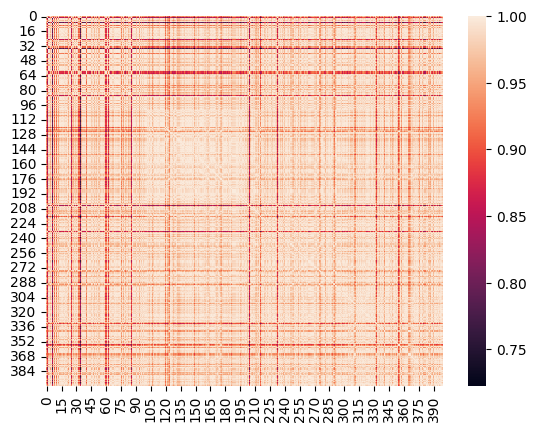

In [12]:
cm=np.corrcoef(df)
hm=sns.heatmap(cm)
plt.show()

In [13]:
target=df["Class"]
target.shape

(400,)

In [14]:
data=df.drop(columns=["Class"])
data.shape

(400, 50)

In [15]:
data.head()

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,0.118,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,0.799,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,0.140,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,0.143,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,0.285,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957


In [16]:
target.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

In [18]:
x_train.shape

(280, 50)

In [19]:
x_test.shape

(120, 50)

In [20]:
y_train.shape

(280,)

In [21]:
y_test.shape

(120,)

In [22]:
x_train.describe()

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,...,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,0.138321,0.551714,7.079136,122.997943,2.405871,0.055832,0.480168,0.022893,0.174011,0.034204,...,0.352754,0.595218,0.348018,0.375721,0.329757,0.192164,0.000114,1.784568,0.773150,0.966489
std,0.065605,0.050860,2.221781,33.768926,0.794657,0.554762,0.305555,0.281711,0.185901,0.203712,...,0.335660,0.361596,0.317250,0.341816,0.057322,0.048558,0.105198,0.930775,0.073309,0.004005
min,0.013000,0.321000,3.580000,51.957000,0.323000,-3.484000,-0.870000,-1.636000,-0.494000,-0.916000,...,0.000000,0.000000,0.000000,0.000000,0.112000,0.060000,-0.279000,0.187000,0.530000,0.939000
25%,0.086750,0.519000,5.796500,101.967750,1.899000,-0.284250,0.269000,-0.120250,0.056000,-0.080000,...,0.064000,0.260000,0.068750,0.059750,0.290750,0.158750,-0.057000,1.016500,0.735750,0.965000
50%,0.130000,0.552000,6.680000,120.287000,2.314000,0.062500,0.471000,0.029500,0.175000,0.042500,...,0.246500,0.623500,0.252000,0.270500,0.335500,0.189000,0.001000,1.682000,0.789500,0.967000
75%,0.186000,0.583000,7.725500,144.600500,2.827500,0.399250,0.687000,0.165500,0.282250,0.145500,...,0.576500,1.000000,0.574000,0.657250,0.369000,0.224500,0.065250,2.243000,0.829000,0.969000
max,0.309000,0.702000,23.475000,195.026000,5.354000,1.937000,1.622000,1.126000,0.770000,0.619000,...,1.000000,1.000000,1.000000,1.000000,0.488000,0.340000,0.355000,4.486000,0.908000,0.977000


In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.fit_transform(x_test)

In [24]:
type(x_train_sc)

numpy.ndarray

In [25]:
type(x_test_sc)

numpy.ndarray

In [26]:
x_train_sc=pd.DataFrame(x_train_sc)

In [27]:
x_test_sc=pd.DataFrame(x_test_sc)

In [28]:
x_train_sc.describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,...,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02
mean,-3.679596e-16,1.141944e-16,7.930164e-17,-6.026925e-17,1.601893e-16,-1.586033e-17,-1.427430e-17,-2.220446e-17,1.141944e-16,-5.551115e-17,...,-4.916702e-17,5.709718e-17,1.237106e-16,1.015061e-16,-1.903239e-17,2.347329e-16,2.696256e-17,-6.978545e-17,-9.992007e-17,1.953358e-14
std,1.001791e+00,1.001791e+00,1.001791e+00,1.001791e+00,1.001791e+00,1.001791e+00,1.001791e+00,1.001791e+00,1.001791e+00,1.001791e+00,...,1.001791e+00,1.001791e+00,1.001791e+00,1.001791e+00,1.001791e+00,1.001791e+00,1.001791e+00,1.001791e+00,1.001791e+00,1.001791e+00
min,-1.913670e+00,-4.544388e+00,-1.577744e+00,-2.107504e+00,-2.625787e+00,-6.392242e+00,-4.426647e+00,-5.899169e+00,-3.599807e+00,-4.672791e+00,...,-1.052807e+00,-1.649031e+00,-1.098949e+00,-1.101160e+00,-3.805651e+00,-2.726638e+00,-2.657978e+00,-1.719458e+00,-3.322729e+00,-6.875416e+00
25%,-7.875005e-01,-6.443745e-01,-5.783344e-01,-6.238827e-01,-6.389912e-01,-6.141216e-01,-6.923328e-01,-5.090286e-01,-6.359416e-01,-5.616159e-01,...,-8.617965e-01,-9.287098e-01,-8.818543e-01,-9.260455e-01,-6.817116e-01,-6.893593e-01,-5.438938e-01,-8.266695e-01,-5.110839e-01,-3.724891e-01
50%,-1.270690e-01,5.627725e-03,-1.799684e-01,-8.042296e-02,-1.158184e-01,1.204084e-02,-3.005764e-02,2.349558e-02,5.331109e-03,4.079913e-02,...,-3.171180e-01,7.835472e-02,-3.031991e-01,-3.083818e-01,1.003655e-01,-6.528135e-02,8.434570e-03,-1.103935e-01,2.234284e-01,1.277361e-01
75%,7.280562e-01,6.162359e-01,2.914426e-01,6.408625e-01,5.315292e-01,6.201452e-01,6.781178e-01,5.071235e-01,5.832849e-01,5.473196e-01,...,6.677801e-01,1.121435e+00,7.135920e-01,8.251008e-01,6.858310e-01,6.671076e-01,6.202810e-01,4.934093e-01,7.632095e-01,6.279612e-01
max,2.606278e+00,2.960183e+00,7.392818e+00,2.136788e+00,3.716580e+00,3.397020e+00,3.743599e+00,3.922746e+00,3.211695e+00,2.875838e+00,...,1.931733e+00,1.121435e+00,2.058788e+00,1.829629e+00,2.765544e+00,3.049951e+00,3.379542e+00,2.907545e+00,1.842772e+00,2.628862e+00


In [29]:
x_train_sc.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.468465,-0.664072,-0.974446,-0.623994,-1.168467,-0.425867,0.065021,0.025274,0.447216,-0.414086,...,-0.429038,-1.643490,-0.726336,1.829629,0.406206,-0.993662,-0.401050,-0.110394,1.214166,0.377849
1,0.361574,-1.333771,-1.009616,-0.433894,-0.147335,0.128515,0.510910,-0.248545,0.684326,0.308812,...,-0.831951,-0.981349,-0.994743,-0.989790,-2.197805,-1.261861,-2.143741,-1.437468,-0.302687,-0.122377
2,-1.363946,0.576842,-1.009165,0.766157,-0.995757,0.386745,0.124036,0.235083,-0.161723,-0.114108,...,1.558665,1.121435,0.896741,-0.233647,-1.323976,-1.880781,-2.438951,0.975591,1.391815,-0.122377
3,-1.211246,0.655630,3.815415,-0.564988,3.473273,0.771381,-0.669383,0.850286,-1.869987,-0.187873,...,-1.052807,-1.496655,-1.048425,-1.101160,-1.079304,1.564542,0.065572,-0.806758,-2.516473,0.127736
4,-0.142339,-0.289828,0.310606,0.246319,1.057854,0.021973,-0.115301,0.455560,1.201655,1.882468,...,-0.691678,-1.632408,-0.470559,-0.693781,0.511065,0.409224,0.894064,-1.262032,-0.220695,-0.872714


In [30]:
x_train_sc.columns=[x_train.columns]

In [31]:
x_train_sc.head()

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,0.468465,-0.664072,-0.974446,-0.623994,-1.168467,-0.425867,0.065021,0.025274,0.447216,-0.414086,...,-0.429038,-1.643490,-0.726336,1.829629,0.406206,-0.993662,-0.401050,-0.110394,1.214166,0.377849
1,0.361574,-1.333771,-1.009616,-0.433894,-0.147335,0.128515,0.510910,-0.248545,0.684326,0.308812,...,-0.831951,-0.981349,-0.994743,-0.989790,-2.197805,-1.261861,-2.143741,-1.437468,-0.302687,-0.122377
2,-1.363946,0.576842,-1.009165,0.766157,-0.995757,0.386745,0.124036,0.235083,-0.161723,-0.114108,...,1.558665,1.121435,0.896741,-0.233647,-1.323976,-1.880781,-2.438951,0.975591,1.391815,-0.122377
3,-1.211246,0.655630,3.815415,-0.564988,3.473273,0.771381,-0.669383,0.850286,-1.869987,-0.187873,...,-1.052807,-1.496655,-1.048425,-1.101160,-1.079304,1.564542,0.065572,-0.806758,-2.516473,0.127736
4,-0.142339,-0.289828,0.310606,0.246319,1.057854,0.021973,-0.115301,0.455560,1.201655,1.882468,...,-0.691678,-1.632408,-0.470559,-0.693781,0.511065,0.409224,0.894064,-1.262032,-0.220695,-0.872714


In [32]:
sc_train_acc=[]
sc_test_acc=[]
algo=["Perceptron", "Logistic Regression", "Support Vector Classifier", "K-Nearest Neighbor", "Naive Bayes", "Decision Tree"]

In [33]:
#Perceptron
from sklearn.linear_model import Perceptron
p1=Perceptron()
p1.fit(x_train_sc, y_train)

Perceptron()

In [34]:
from sklearn.metrics import accuracy_score
x_train_pred=p1.predict(x_train_sc)
x_test_pred=p1.predict(x_test_sc)
sc_train_acc.append(accuracy_score(x_train_pred, y_train))
sc_test_acc.append(accuracy_score(x_test_pred, y_test))
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 0.8535714285714285
Testing Accuracy: 0.8083333333333333


In [35]:
p2=Perceptron(penalty="l1")
p2.fit(x_train_sc, y_train)

Perceptron(penalty='l1')

In [36]:
x_train_pred=p2.predict(x_train_sc)
x_test_pred=p2.predict(x_test_sc)
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 0.8321428571428572
Testing Accuracy: 0.7833333333333333


In [37]:
p3=Perceptron(penalty="l2")
p3.fit(x_train_sc, y_train)

Perceptron(penalty='l2')

In [38]:
x_train_pred=p3.predict(x_train_sc)
x_test_pred=p3.predict(x_test_sc)
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 0.8321428571428572
Testing Accuracy: 0.8333333333333334


In [39]:
p4=Perceptron(penalty="elasticnet")
p4.fit(x_train_sc, y_train)

Perceptron(penalty='elasticnet')

In [40]:
x_train_pred=p4.predict(x_train_sc)
x_test_pred=p4.predict(x_test_sc)
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 0.8214285714285714
Testing Accuracy: 0.8


In [41]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_sc, y_train)

LogisticRegression()

In [42]:
x_train_pred=lr.predict(x_train_sc)
x_test_pred=lr.predict(x_test_sc)
sc_train_acc.append(accuracy_score(x_train_pred, y_train))
sc_test_acc.append(accuracy_score(x_test_pred, y_test))
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 0.9285714285714286
Testing Accuracy: 0.8333333333333334


In [43]:
#Support Vector Classifier
from sklearn.svm import SVC
svc1=SVC() #Default kernel="rbf"
svc1.fit(x_train_sc, y_train)

SVC()

In [44]:
x_train_pred=svc1.predict(x_train_sc)
x_test_pred=svc1.predict(x_test_sc)
sc_train_acc.append(accuracy_score(x_train_pred, y_train))
sc_test_acc.append(accuracy_score(x_test_pred, y_test))
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 0.9678571428571429
Testing Accuracy: 0.8333333333333334


In [45]:
svc2=SVC(kernel="linear")
svc2.fit(x_train_sc, y_train)

SVC(kernel='linear')

In [46]:
x_train_pred=svc2.predict(x_train_sc)
x_test_pred=svc2.predict(x_test_sc)
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 0.9607142857142857
Testing Accuracy: 0.7916666666666666


In [47]:
svc3=SVC(kernel="poly")
svc3.fit(x_train_sc, y_train)

SVC(kernel='poly')

In [48]:
x_train_pred=svc3.predict(x_train_sc)
x_test_pred=svc3.predict(x_test_sc)
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 0.9571428571428572
Testing Accuracy: 0.675


In [49]:
#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier() #Default Neighbors=5
knn1.fit(x_train_sc, y_train)

KNeighborsClassifier()

In [50]:
x_train_pred=knn1.predict(x_train_sc)
x_test_pred=knn1.predict(x_test_sc)
sc_train_acc.append(accuracy_score(x_train_pred, y_train))
sc_test_acc.append(accuracy_score(x_test_pred, y_test))
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 0.8142857142857143
Testing Accuracy: 0.6916666666666667


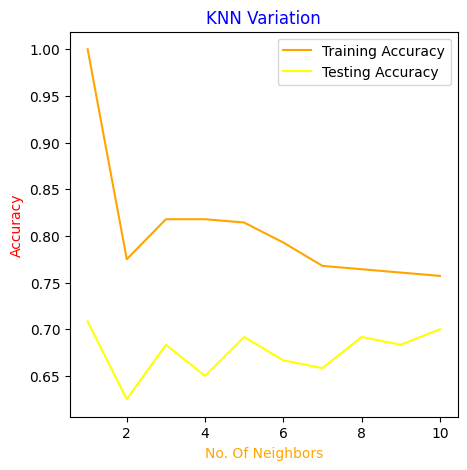

In [51]:
ktrain_acc=[]
ktest_acc=[]
k=range(1,11)
for i in range(1, 11):
  knn2=KNeighborsClassifier(n_neighbors=i)
  knn2.fit(x_train_sc, y_train)
  x_train_pred=knn2.predict(x_train_sc)
  x_test_pred=knn2.predict(x_test_sc)
  ktrain_acc.append(accuracy_score(x_train_pred, y_train))
  ktest_acc.append(accuracy_score(x_test_pred, y_test))
plt.figure(figsize=(5,5))
plt.plot(k, ktrain_acc, color="orange", label="Training Accuracy")
plt.plot(k, ktest_acc, color="yellow", label="Testing Accuracy")
plt.ylabel("Accuracy", color="red")
plt.xlabel("No. Of Neighbors", color="orange")
plt.title("KNN Variation", color="blue")
plt.legend()
plt.show()

In [52]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train_sc, y_train)

GaussianNB()

In [53]:
x_train_pred=nb.predict(x_train_sc)
x_test_pred=nb.predict(x_test_sc)
sc_train_acc.append(accuracy_score(x_train_pred, y_train))
sc_test_acc.append(accuracy_score(x_test_pred, y_test))
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 0.8
Testing Accuracy: 0.75


In [54]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier() # Default gini
dt1.fit(x_train_sc, y_train)

DecisionTreeClassifier()

In [55]:
x_train_pred=dt1.predict(x_train_sc)
x_test_pred=dt1.predict(x_test_sc)
sc_train_acc.append(accuracy_score(x_train_pred, y_train))
sc_test_acc.append(accuracy_score(x_test_pred, y_test))
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 1.0
Testing Accuracy: 0.65


In [56]:
dt2=DecisionTreeClassifier(criterion="entropy")
dt2.fit(x_train_sc, y_train)

DecisionTreeClassifier(criterion='entropy')

In [57]:
x_train_pred=dt2.predict(x_train_sc)
x_test_pred=dt2.predict(x_test_sc)
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 1.0
Testing Accuracy: 0.65


In [58]:
#Implementing PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=40) #n_components must be between 0 and min(n_samples, n_features)

In [59]:
x_train_pca=pca.fit_transform(x_train_sc)
x_test_pca=pca.fit_transform(x_test_sc)

In [60]:
print(type(x_train_pca))
print(type(x_test_pca))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [61]:
x_train_pca=pd.DataFrame(x_train_pca)
x_test_pca=pd.DataFrame(x_test_pca)

In [62]:
x_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-3.517587,-2.543087,-0.174530,1.541279,0.973482,1.340930,-0.894955,-0.929262,0.008282,1.075923,...,0.300298,0.550425,1.094309,-0.647577,-0.264011,0.320148,-0.420000,0.150995,0.462295,1.157460
1,0.704884,-2.078870,-2.622856,0.627436,-0.221816,-1.201768,1.586151,-0.399656,0.088195,0.501573,...,-0.237945,-0.743344,0.042156,-0.658593,-0.844268,0.145285,-0.742090,-0.504365,0.994843,0.244158
2,-2.632285,0.146494,-0.204179,-1.345271,1.018108,-0.766162,-0.735527,-2.015528,-0.888009,0.384408,...,-1.023733,-0.839435,-0.895967,0.602296,0.457940,0.472997,0.214464,1.053203,-0.764981,-0.245952
3,9.083537,0.764471,1.379142,1.906263,-0.974241,-1.699413,1.915113,1.970912,-0.510012,0.204639,...,-0.494458,0.012761,1.564441,-0.130881,-0.367105,0.205989,-0.297904,1.654545,0.112020,1.035028
4,2.149938,-0.150182,0.253654,-2.540977,0.783733,0.693774,0.882368,0.421689,1.040589,0.326884,...,0.297625,0.287666,-0.926923,0.789523,0.084587,-0.215292,-0.835898,-0.435537,0.100739,0.914158


In [63]:
pca_train_acc=[]
pca_test_acc=[]

In [64]:
#Perceptron
p=Perceptron()
p.fit(x_train_pca, y_train)

Perceptron()

In [65]:
x_train_pred=p.predict(x_train_pca)
x_test_pred=p.predict(x_test_pca)
pca_train_acc.append(accuracy_score(x_train_pred, y_train))
pca_test_acc.append(accuracy_score(x_test_pred, y_test))
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 0.8142857142857143
Testing Accuracy: 0.175


In [66]:
#Logistic Regression
lr=LogisticRegression()
lr.fit(x_train_pca, y_train)

LogisticRegression()

In [67]:
x_train_pred=lr.predict(x_train_pca)
x_test_pred=lr.predict(x_test_pca)
pca_train_acc.append(accuracy_score(x_train_pred, y_train))
pca_test_acc.append(accuracy_score(x_test_pred, y_test))
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 0.925
Testing Accuracy: 0.21666666666666667


In [68]:
#Support Vector Classifier
svc=SVC()
svc.fit(x_train_pca, y_train)

SVC()

In [69]:
x_train_pred=svc.predict(x_train_pca)
x_test_pred=svc.predict(x_test_pca)
pca_train_acc.append(accuracy_score(x_train_pred, y_train))
pca_test_acc.append(accuracy_score(x_test_pred, y_test))
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 0.9607142857142857
Testing Accuracy: 0.25833333333333336


In [70]:
#K-Nearest Neighbors
knn=KNeighborsClassifier() #Default Neighbors=5
knn.fit(x_train_pca, y_train)

KNeighborsClassifier()

In [71]:
x_train_pred=knn.predict(x_train_pca)
x_test_pred=knn.predict(x_test_pca)
pca_train_acc.append(accuracy_score(x_train_pred, y_train))
pca_test_acc.append(accuracy_score(x_test_pred, y_test))
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 0.8142857142857143
Testing Accuracy: 0.25833333333333336


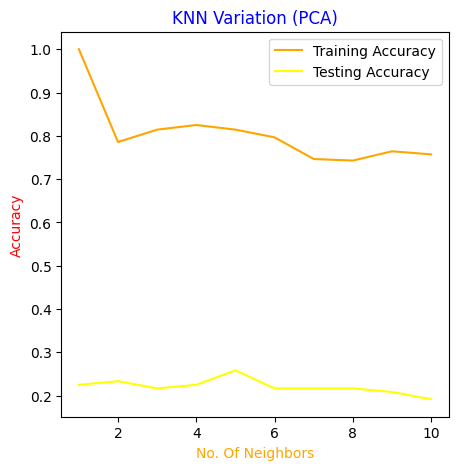

In [72]:
ktrain_acc=[]
ktest_acc=[]
k=range(1,11)
for i in range(1, 11):
  knn2=KNeighborsClassifier(n_neighbors=i)
  knn2.fit(x_train_pca, y_train)
  x_train_pred=knn2.predict(x_train_pca)
  x_test_pred=knn2.predict(x_test_pca)
  ktrain_acc.append(accuracy_score(x_train_pred, y_train))
  ktest_acc.append(accuracy_score(x_test_pred, y_test))
plt.figure(figsize=(5,5))
plt.plot(k, ktrain_acc, color="orange", label="Training Accuracy")
plt.plot(k, ktest_acc, color="yellow", label="Testing Accuracy")
plt.ylabel("Accuracy", color="red")
plt.xlabel("No. Of Neighbors", color="orange")
plt.title("KNN Variation (PCA)", color="blue")
plt.legend()
plt.show()

In [73]:
#Naive Bayes
nb=GaussianNB()
nb.fit(x_train_pca, y_train)

GaussianNB()

In [74]:
x_train_pred=nb.predict(x_train_pca)
x_test_pred=nb.predict(x_test_pca)
pca_train_acc.append(accuracy_score(x_train_pred, y_train))
pca_test_acc.append(accuracy_score(x_test_pred, y_test))
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 0.8392857142857143
Testing Accuracy: 0.26666666666666666


In [75]:
#Decision Tree
dt=DecisionTreeClassifier()
dt.fit(x_train_pca, y_train)

DecisionTreeClassifier()

In [76]:
x_train_pred=dt.predict(x_train_pca)
x_test_pred=dt.predict(x_test_pca)
pca_train_acc.append(accuracy_score(x_train_pred, y_train))
pca_test_acc.append(accuracy_score(x_test_pred, y_test))
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 1.0
Testing Accuracy: 0.23333333333333334


In [77]:
#Implementing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA(n_components=3) #n_components cannot be larger than min(n_features, n_classes - 1)

In [78]:
x_train_lda=lda.fit_transform(x_train_sc, y_train)
x_test_lda=lda.transform(x_test_sc)

In [79]:
print(type(x_train_lda))
print(type(x_test_lda))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [80]:
x_train_lda=pd.DataFrame(x_train_lda)
x_test_lda=pd.DataFrame(x_test_lda)

In [81]:
x_train_lda.head()

,0,1,2
0,-4.582455,-0.842135,-1.299998
1,-0.191531,3.542659,0.447230
2,-1.098276,2.785302,0.643729
3,1.046138,-2.144858,0.179192
4,1.268681,-0.259650,1.460909


In [82]:
lda_train_acc=[]
lda_test_acc=[]

In [83]:
#Perceptron
p=Perceptron()
p.fit(x_train_lda, y_train)

Perceptron()

In [84]:
x_train_pred=p.predict(x_train_lda)
x_test_pred=p.predict(x_test_lda)
lda_train_acc.append(accuracy_score(x_train_pred, y_train))
lda_test_acc.append(accuracy_score(x_test_pred, y_test))
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 0.8821428571428571
Testing Accuracy: 0.8


In [85]:
#Logistic Regression
lr=LogisticRegression()
lr.fit(x_train_lda, y_train)

LogisticRegression()

In [86]:
x_train_pred=lr.predict(x_train_lda)
x_test_pred=lr.predict(x_test_lda)
lda_train_acc.append(accuracy_score(x_train_pred, y_train))
lda_test_acc.append(accuracy_score(x_test_pred, y_test))
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 0.8821428571428571
Testing Accuracy: 0.8083333333333333


In [87]:
#Support Vector Classifier
svc=SVC()
svc.fit(x_train_lda, y_train)

SVC()

In [88]:
x_train_pred=svc.predict(x_train_lda)
x_test_pred=svc.predict(x_test_lda)
lda_train_acc.append(accuracy_score(x_train_pred, y_train))
lda_test_acc.append(accuracy_score(x_test_pred, y_test))
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 0.9035714285714286
Testing Accuracy: 0.8333333333333334


In [89]:
#K-Nearest Neighbors
knn=KNeighborsClassifier() #Default Neighbors=5
knn.fit(x_train_lda, y_train)

KNeighborsClassifier()

In [90]:
x_train_pred=knn.predict(x_train_lda)
x_test_pred=knn.predict(x_test_lda)
lda_train_acc.append(accuracy_score(x_train_pred, y_train))
lda_test_acc.append(accuracy_score(x_test_pred, y_test))
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 0.9
Testing Accuracy: 0.7916666666666666


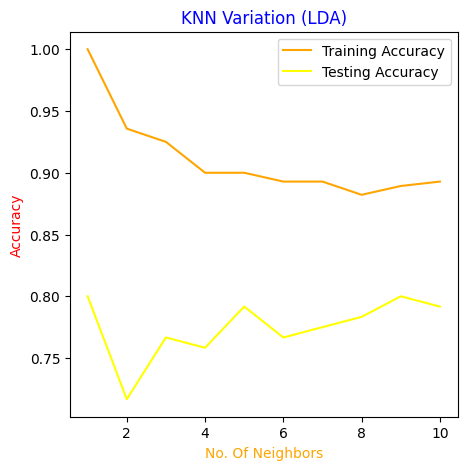

In [91]:
ktrain_acc=[]
ktest_acc=[]
k=range(1,11)
for i in range(1, 11):
  knn2=KNeighborsClassifier(n_neighbors=i)
  knn2.fit(x_train_lda, y_train)
  x_train_pred=knn2.predict(x_train_lda)
  x_test_pred=knn2.predict(x_test_lda)
  ktrain_acc.append(accuracy_score(x_train_pred, y_train))
  ktest_acc.append(accuracy_score(x_test_pred, y_test))
plt.figure(figsize=(5,5))
plt.plot(k, ktrain_acc, color="orange", label="Training Accuracy")
plt.plot(k, ktest_acc, color="yellow", label="Testing Accuracy")
plt.ylabel("Accuracy", color="red")
plt.xlabel("No. Of Neighbors", color="orange")
plt.title("KNN Variation (LDA)", color="blue")
plt.legend()
plt.show()

In [92]:
#Naive Bayes
nb=GaussianNB()
nb.fit(x_train_lda, y_train)

GaussianNB()

In [93]:
x_train_pred=nb.predict(x_train_lda)
x_test_pred=nb.predict(x_test_lda)
lda_train_acc.append(accuracy_score(x_train_pred, y_train))
lda_test_acc.append(accuracy_score(x_test_pred, y_test))
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 0.9035714285714286
Testing Accuracy: 0.8166666666666667


In [94]:
#Decision Tree
dt=DecisionTreeClassifier()
dt.fit(x_train_lda, y_train)

DecisionTreeClassifier()

In [95]:
x_train_pred=dt.predict(x_train_lda)
x_test_pred=dt.predict(x_test_lda)
lda_train_acc.append(accuracy_score(x_train_pred, y_train))
lda_test_acc.append(accuracy_score(x_test_pred, y_test))
print("Training Accuracy:", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy:", accuracy_score(x_test_pred, y_test))

Training Accuracy: 1.0
Testing Accuracy: 0.775


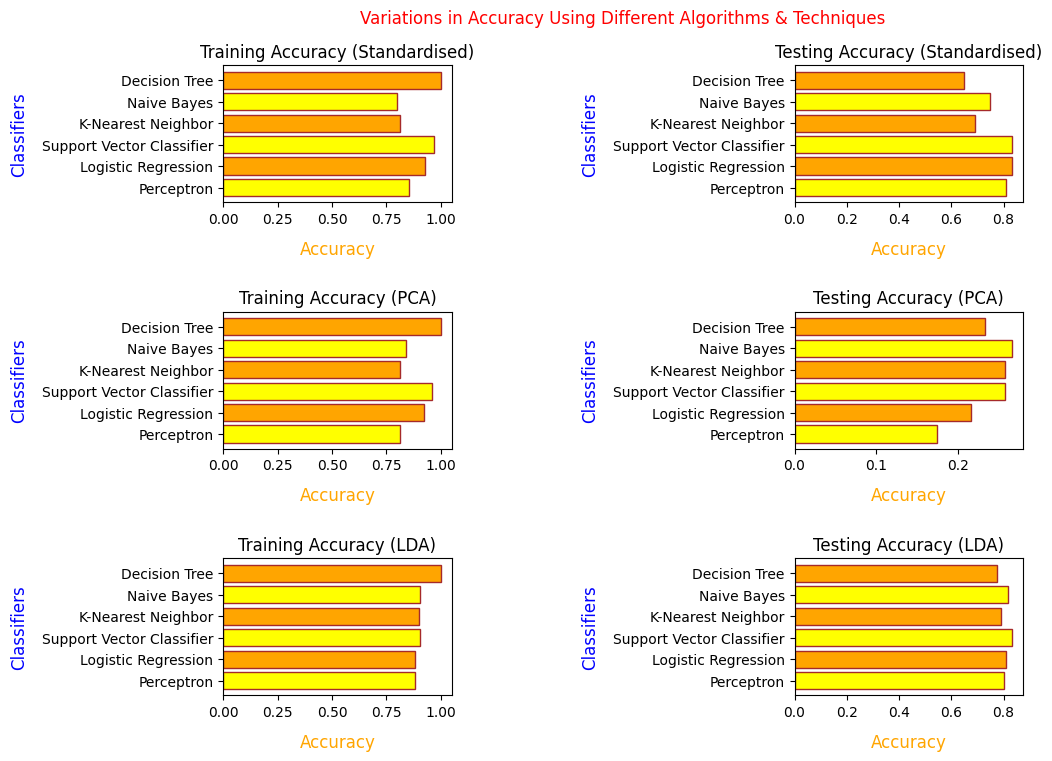

In [96]:
c=["yellow", "orange"]
fig, ax=plt.subplots(3,2, figsize=(10,7))

ax[0,0].barh(algo, sc_train_acc, color=c, edgecolor="brown")
ax[0,1].barh(algo, sc_test_acc, color=c, edgecolor="brown")
ax[1,0].barh(algo, pca_train_acc, color=c, edgecolor="brown")
ax[1,1].barh(algo, pca_test_acc, color=c, edgecolor="brown")
ax[2,0].barh(algo, lda_train_acc, color=c, edgecolor="brown")
ax[2,1].barh(algo, lda_test_acc, color=c, edgecolor="brown")

ax[0,0].set_title("Training Accuracy (Standardised)")
ax[0,1].set_title("Testing Accuracy (Standardised)")
ax[1,0].set_title("Training Accuracy (PCA)")
ax[1,1].set_title("Testing Accuracy (PCA)")
ax[2,0].set_title("Training Accuracy (LDA)")
ax[2,1].set_title("Testing Accuracy (LDA)")

ax[0,0].set_xlabel("Accuracy", labelpad=10, fontsize=12, color="orange")
ax[0,1].set_xlabel("Accuracy", labelpad=10, fontsize=12, color="orange")
ax[1,0].set_xlabel("Accuracy", labelpad=10, fontsize=12, color="orange")
ax[1,1].set_xlabel("Accuracy", labelpad=10, fontsize=12, color="orange")
ax[2,0].set_xlabel("Accuracy", labelpad=10, fontsize=12, color="orange")
ax[2,1].set_xlabel("Accuracy", labelpad=10, fontsize=12, color="orange")

ax[0,0].set_ylabel("Classifiers", labelpad=10, fontsize=12, color="blue")
ax[0,1].set_ylabel("Classifiers", labelpad=10, fontsize=12, color="blue")
ax[1,0].set_ylabel("Classifiers", labelpad=10, fontsize=12, color="blue")
ax[1,1].set_ylabel("Classifiers", labelpad=10, fontsize=12, color="blue")
ax[2,0].set_ylabel("Classifiers", labelpad=10, fontsize=12, color="blue")
ax[2,1].set_ylabel("Classifiers", labelpad=10, fontsize=12, color="blue")

fig.suptitle("Variations in Accuracy Using Different Algorithms & Techniques", color="red")
plt.subplots_adjust(left=0.1, bottom=0, right=0.9, top=0.9, wspace=1.5, hspace=0.8)
plt.show()

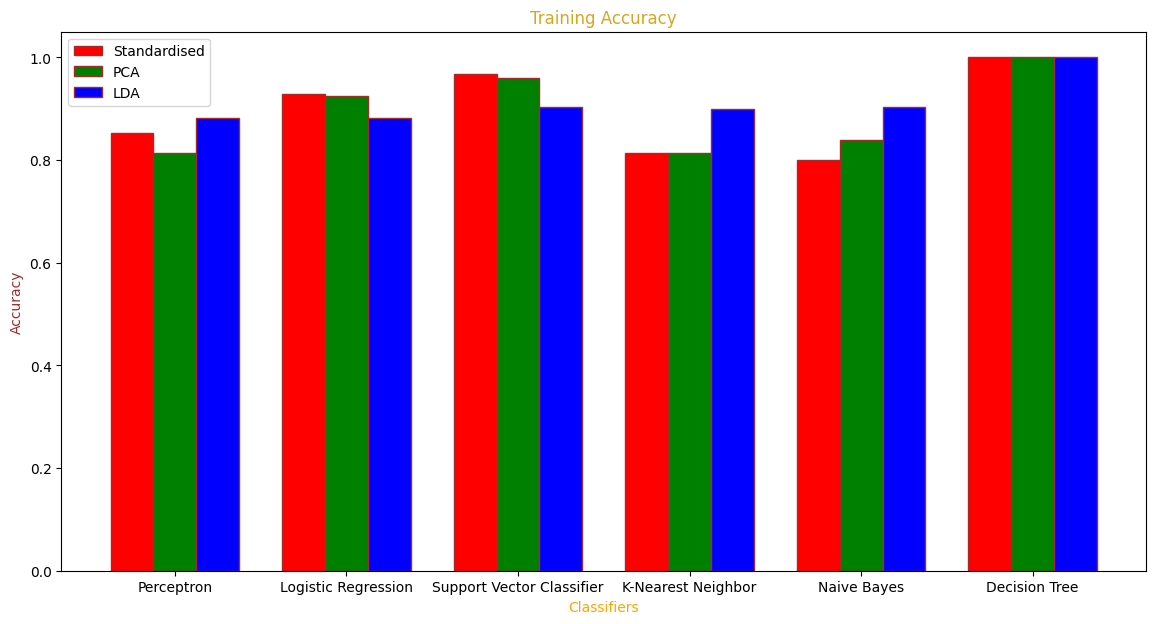

In [97]:
ind=np.arange(6)
width=0.25

plt.figure(figsize=(14,7))
bar1=plt.bar(ind, sc_train_acc, width, color="red", edgecolor="brown")
bar2=plt.bar(ind+width, pca_train_acc, width, color="green", edgecolor="brown")
bar3=plt.bar(ind+width*2, lda_train_acc, width, color="blue", edgecolor="brown")

plt.xlabel("Classifiers", color="orange")
plt.ylabel('Accuracy', color="brown")
plt.title("Training Accuracy", color="goldenrod")

plt.xticks(ind+width,algo)
plt.legend( (bar1, bar2, bar3), ("Standardised", "PCA", "LDA") )
plt.show()

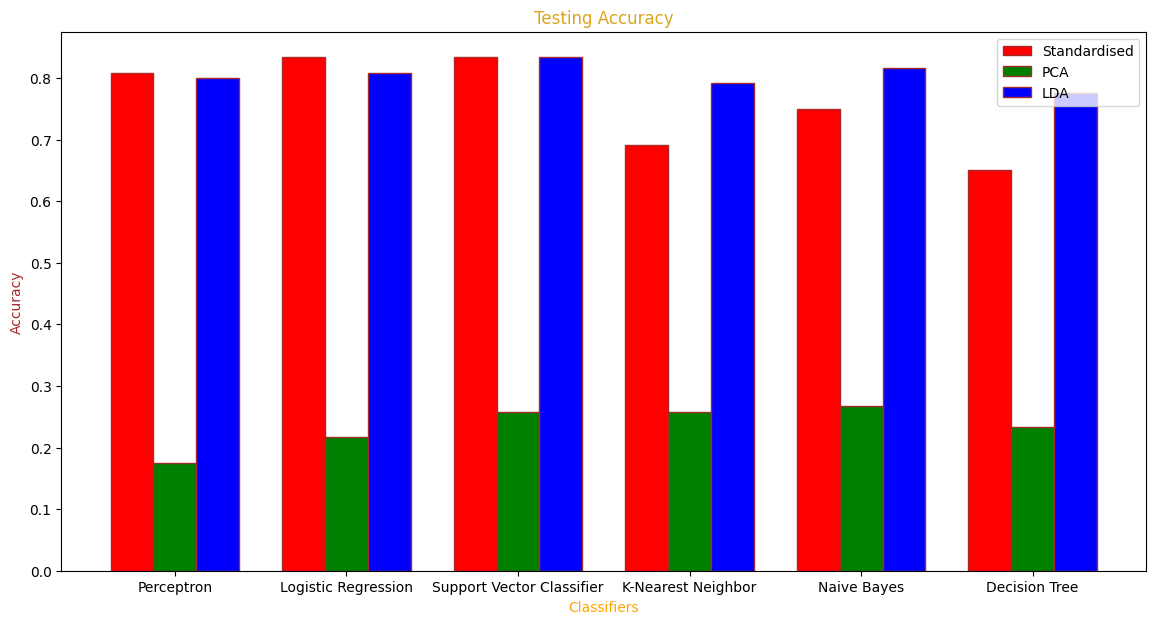

In [98]:
ind=np.arange(6)
width=0.25

plt.figure(figsize=(14,7))
bar1=plt.bar(ind, sc_test_acc, width, color="red", edgecolor="brown")
bar2=plt.bar(ind+width, pca_test_acc, width, color="green", edgecolor="brown")
bar3=plt.bar(ind+width*2, lda_test_acc, width, color="blue", edgecolor="brown")

plt.xlabel("Classifiers", color="orange")
plt.ylabel('Accuracy', color="brown")
plt.title("Testing Accuracy", color="goldenrod")

plt.xticks(ind+width,algo)
plt.legend( (bar1, bar2, bar3), ("Standardised", "PCA", "LDA") )
plt.show()